First, import libraries and data:
- Typically, we install numpy, pandas, and matplotlib
- There's usually one .csv file that we need to extract

In [170]:
# !pip install plotly
# !pip install -U kaleido
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('ggplot')

import plotly.express as px
import warnings
import kaleido

warnings.filterwarnings("ignore")

In [171]:
df = pd.read_csv('adult_data.csv')

In [172]:
df.head()

,Age,work class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [173]:
df.dtypes

Age                 int64
 work class        object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income-binary     object
dtype: object

We see that the 'fnlwgt' column represents the number of individuals that the census believes the entry represents. For example, from row 0, we can deduce there are 77516 individuals with an age of 39, bachelor's education, etc.

We can normalize the values such that they all now sum to one.

In [174]:
print("There are " + str(df[df.columns[2]].sum()) + " individuals accounted for!")

There are 6179373392 individuals accounted for!


In [175]:
sum = df[df.columns[2]].sum()
df[df.columns[2]] /= sum

In [176]:
df[df.columns[2]]

0        0.000013
1        0.000013
2        0.000035
3        0.000038
4        0.000055
           ...   
32556    0.000042
32557    0.000025
32558    0.000025
32559    0.000033
32560    0.000047
Name:  fnlwgt, Length: 32561, dtype: float64

In [177]:
# Drop missing values (NaN)
df.dropna()

,Age,work class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-binary
0,39,State-gov,0.000013,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,0.000013,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,0.000035,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0.000038,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,0.000055,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,0.000042,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,0.000025,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,0.000025,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,0.000033,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Saving all unique values inside of separate lists: There are spaces before each value, so the line below removes the space.

In [178]:
married_list = df[df.columns[5]].unique()
married_list = [married_list[i][1:] for i in range(len(married_list))]

occupation_list = df[df.columns[6]].unique()
occupation_list = [occupation_list[i][1:] for i in range(len(occupation_list))]

relationship_list = df[df.columns[7]].unique()
relationship_list = [relationship_list[i][1:] for i in range(len(relationship_list))]

race_list = df[df.columns[8]].unique()
race_list = [race_list[i][1:] for i in range(len(race_list))]

gender_list = df[df.columns[9]].unique()
gender_list = [gender_list[i][1:] for i in range(len(gender_list))]

gender_list

['Male', 'Female']

In [179]:
df.describe()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.000031,10.080679,1077.648844,87.303830,40.437456
std,13.640433,0.000017,2.572720,7385.292085,402.960219,12.347429
min,17.000000,0.000002,1.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000019,9.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000029,10.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000038,12.000000,0.000000,0.000000,45.000000
max,90.000000,0.000240,16.000000,99999.000000,4356.000000,99.000000


Change the binary values to the typical binary classification dataset and shuffle the values accordingly.

In [180]:
# Replace binary values in column
df[" income-binary"] = df[" income-binary"].replace(" <=50K", 0)
df[" income-binary"] = df[" income-binary"].replace(" >50K", 1)

df[" income-binary"]
df = df.sample(frac = 1)
df.reset_index()
df

,Age,work class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-binary
25972,26,Private,0.000016,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,45,United-States,1
19463,55,Private,0.000031,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,0
31544,39,Private,0.000037,10th,6,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,0
28856,32,Private,0.000014,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,38,United-States,0
25383,36,Local-gov,0.000028,Assoc-voc,11,Never-married,Protective-serv,Not-in-family,Black,Female,0,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,46,Self-emp-inc,0.000045,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,0
3286,29,Private,0.000074,5th-6th,3,Never-married,Other-service,Not-in-family,White,Male,0,0,25,Mexico,0
23332,20,Private,0.000026,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States,0
24924,69,Private,0.000033,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,991,0,18,United-States,0


Exploratory Data Analysis

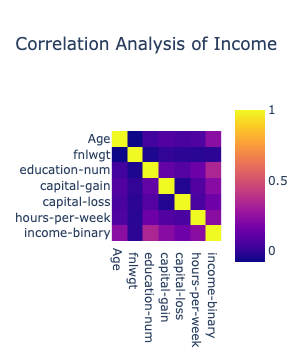

In [181]:
px.imshow(df.corr(), title="Correlation Analysis of Income")

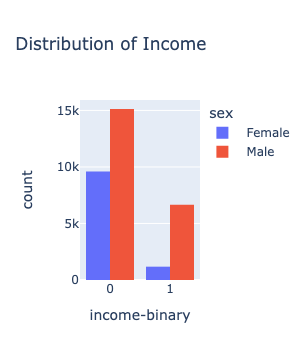

In [182]:
fig=px.histogram(df, 
                 x=" income-binary",
                 color=" sex",
                 hover_data=df.columns,
                 title="Distribution of Income",
                 barmode="group")
fig.show()

In [183]:
print("Here below shows the split for race:")
print(df[' sex'].value_counts(normalize=True) * 100)
print("The histogram above is representative, since it's not that skewed towards males.")

Here below shows the split for race:
 Male      66.920549
 Female    33.079451
Name:  sex, dtype: float64
The histogram above is representative, since it's not that skewed towards males.


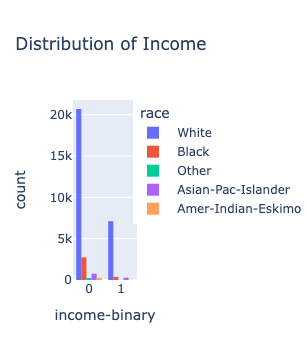

In [184]:
fig=px.histogram(df, 
                 x=" income-binary",
                 color=" race",
                 hover_data=df.columns,
                 title="Distribution of Income",
                 barmode="group")
fig.show()

In [185]:
print("Here below shows the split for race:")
print(df[' race'].value_counts(normalize=True) * 100)
print("The histogram above isn't that representative, since it's skewed towards whites.")

Here below shows the split for race:
 White                 85.427352
 Black                  9.594300
 Asian-Pac-Islander     3.190934
 Amer-Indian-Eskimo     0.955130
 Other                  0.832284
Name:  race, dtype: float64
The histogram above isn't that representative, since it's skewed towards whites.


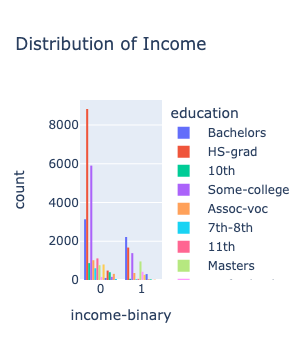

In [186]:
fig=px.histogram(df, 
                 x=" income-binary",
                 color=" education",
                 hover_data=df.columns,
                 title="Distribution of Income",
                 barmode="group")
fig.show()

In [187]:
print("Here below shows the split for race:")
print(df[' education'].value_counts(normalize=True) * 100)
print("The histogram above isn't that representative, since it's skewed towards hs-grads and some-college.")

Here below shows the split for race:
 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name:  education, dtype: float64
The histogram above isn't that representative, since it's skewed towards hs-grads and some-college.


Problems Assessed with Data:
- Skewed towards certain groups, i.e. males and whites
- Still have to deal with final weight column to get more representative idea of EDA
- Uneven levels of data for each group, i.e. more whites with <=50K in data than >50K

In [188]:
# Looking at all data columns takes too long
# (let us look at the last few!)
df2 = df.iloc[:, 10:]
df2

,capital-gain,capital-loss,hours-per-week,native-country,income-binary
25972,0,0,45,United-States,1
19463,0,0,40,United-States,0
31544,0,0,40,United-States,0
28856,0,0,38,United-States,0
25383,0,0,60,United-States,1
...,...,...,...,...,...
3248,0,0,45,United-States,0
3286,0,0,25,Mexico,0
23332,0,0,38,United-States,0
24924,991,0,18,United-States,0


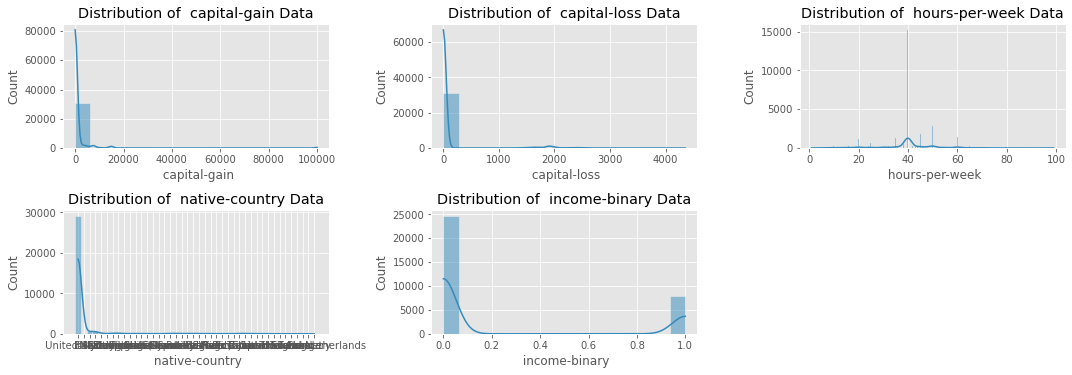

In [189]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df2.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df2[col],kde=True)
    plt.tight_layout()
    plt.plot()

There's still a problem with our data; the final weight category is not taken into effect. Therefore, our dataset isn't actually representative of the global population, since some groups are underrepresented over overrepresented.

What the below code does is create a new dataset, look at each row, take its final weight value, and concatenate that amount of rows to the new dataset.


In [216]:
new_df = pd.DataFrame()
for i in range(df.shape[0]):
    number = math.ceil(df[df.columns[3]][i] * 250000)
    if (i % 100 == 0): print(i)
    for j in range(number):
        new_df = pd.concat([new_df, df.iloc[[i]]])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [220]:
new_df.to_csv('clean_df_large.csv')